# TP 6

## Author : Petter Stahle
### Email : *petter.stahle@etu.unige.ch*

In [131]:
import numpy as np
# from sklearn.metrics import mean_absolute_error as MAE, \
#     mean_squared_error as MSE, accuracy_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format ='retina'

from ga import GA

plt.style.use(['notebook', 'science', 'grid'])
import matplotlib as mlp
mlp.rcParams['text.usetex'] = False

np.set_printoptions(precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Minimization function

$$ f(x,y) = - \bigg| \frac{1}{2}x\sin(\sqrt{|x|}) \bigg| - \bigg| y \sin (30 \sqrt{|\frac{x}{y}|}) \bigg| $$

In [2]:
def f(x, y):
    return (
        - np.abs(0.5 * x * np.sin( np.sqrt(np.abs(x)) ))
        - np.abs(y * np.sin( 30 * np.sqrt(np.abs(x/y)) ))
    )

In [49]:
x = y = np.arange(10, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
print(Z.shape)

(990, 990)


## Visualization

### Contour plot

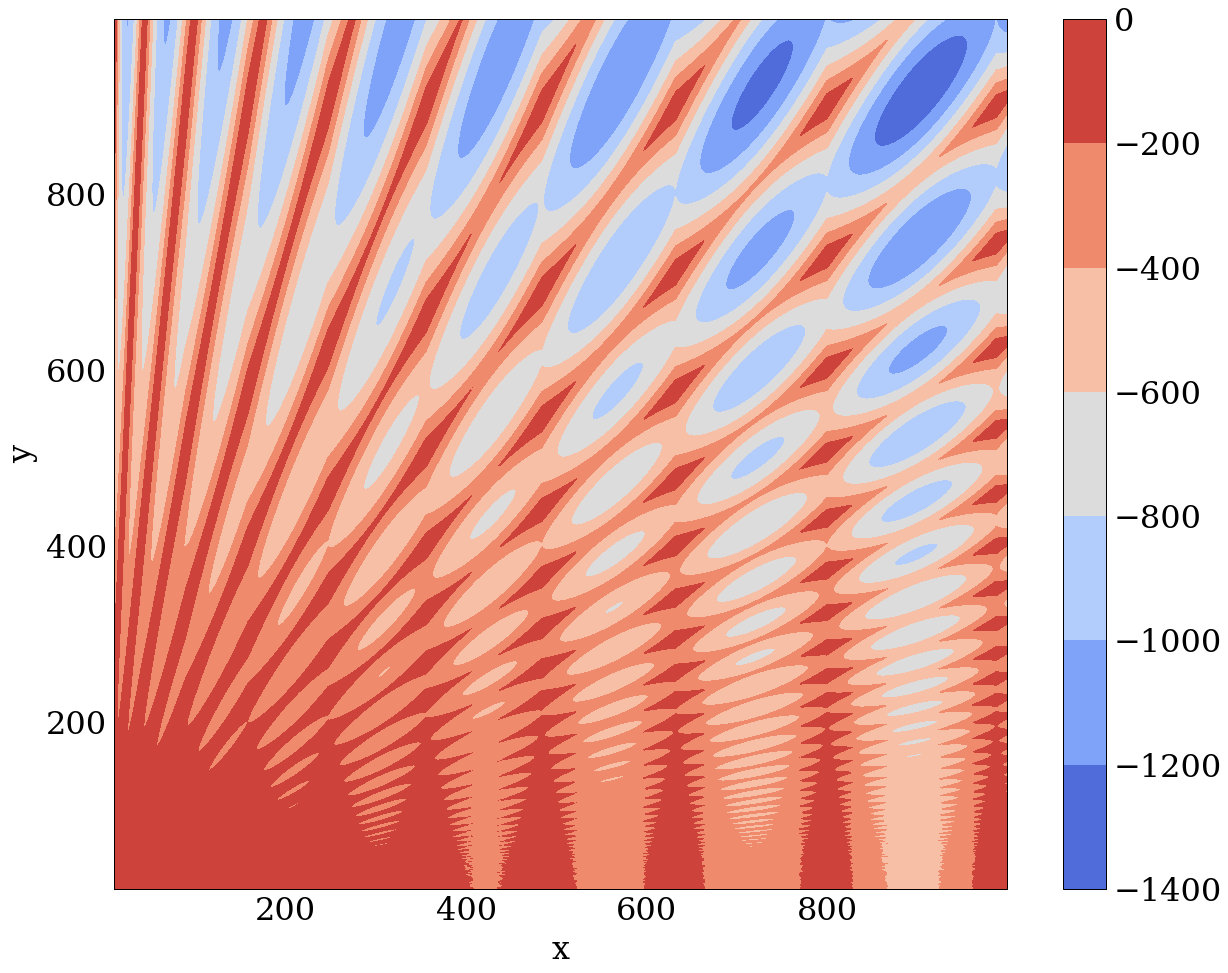

In [83]:
plt.figure(figsize=(10,8))

plt.contourf(x, y, Z, cmap='coolwarm')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.colorbar()

<ipython-input-84-727aba65a9f0>:5: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour3D(x, y, Z, cmap='coolwarm', label=r'$f(x,y)$')


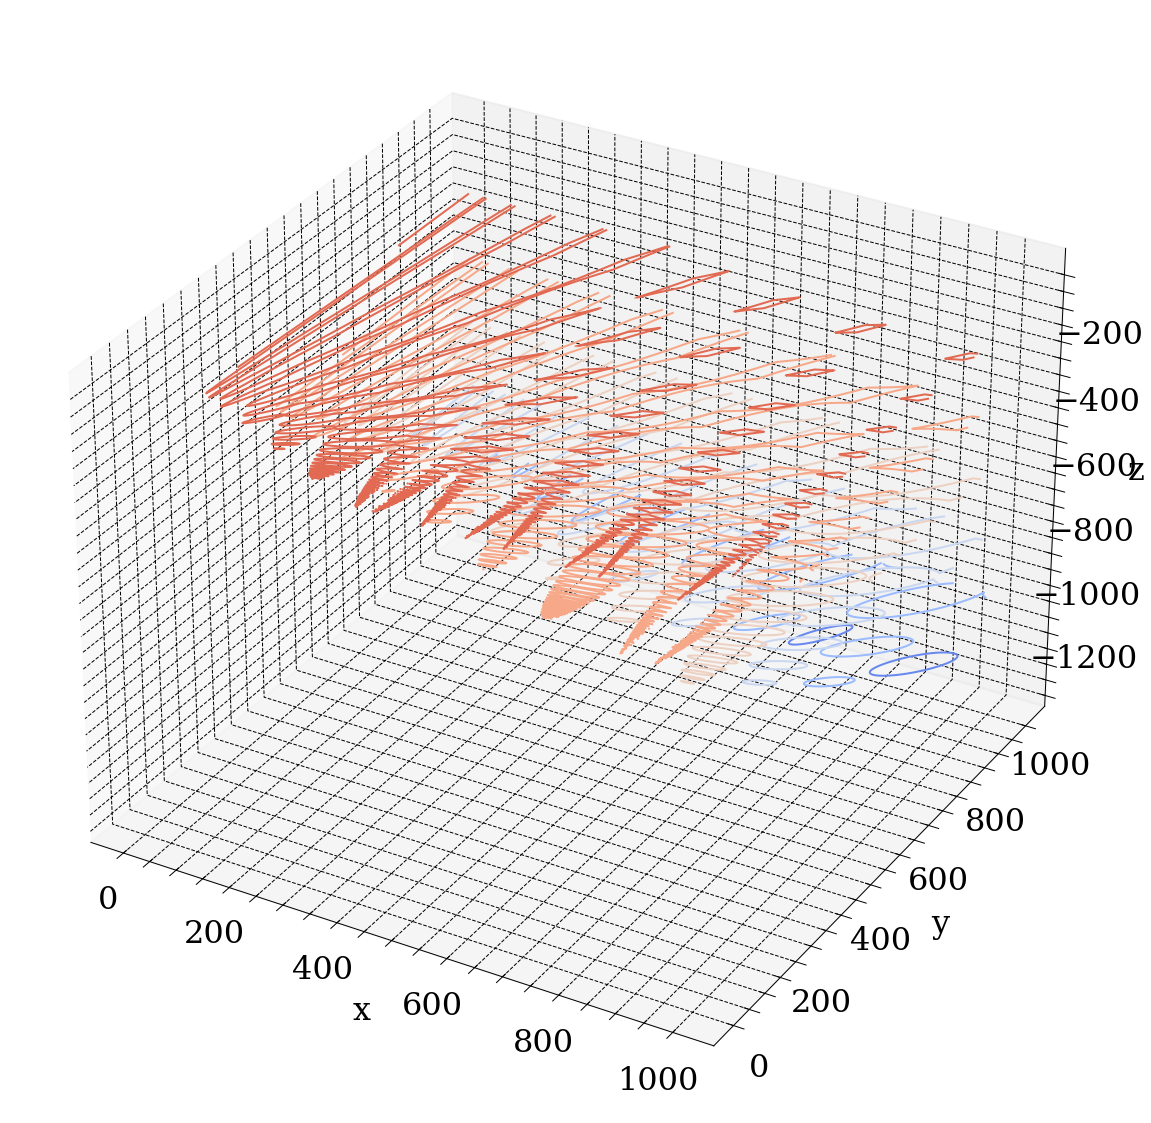

In [84]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection='3d')

ax.contour3D(x, y, Z, cmap='coolwarm', label=r'$f(x,y)$')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')

fig.tight_layout()

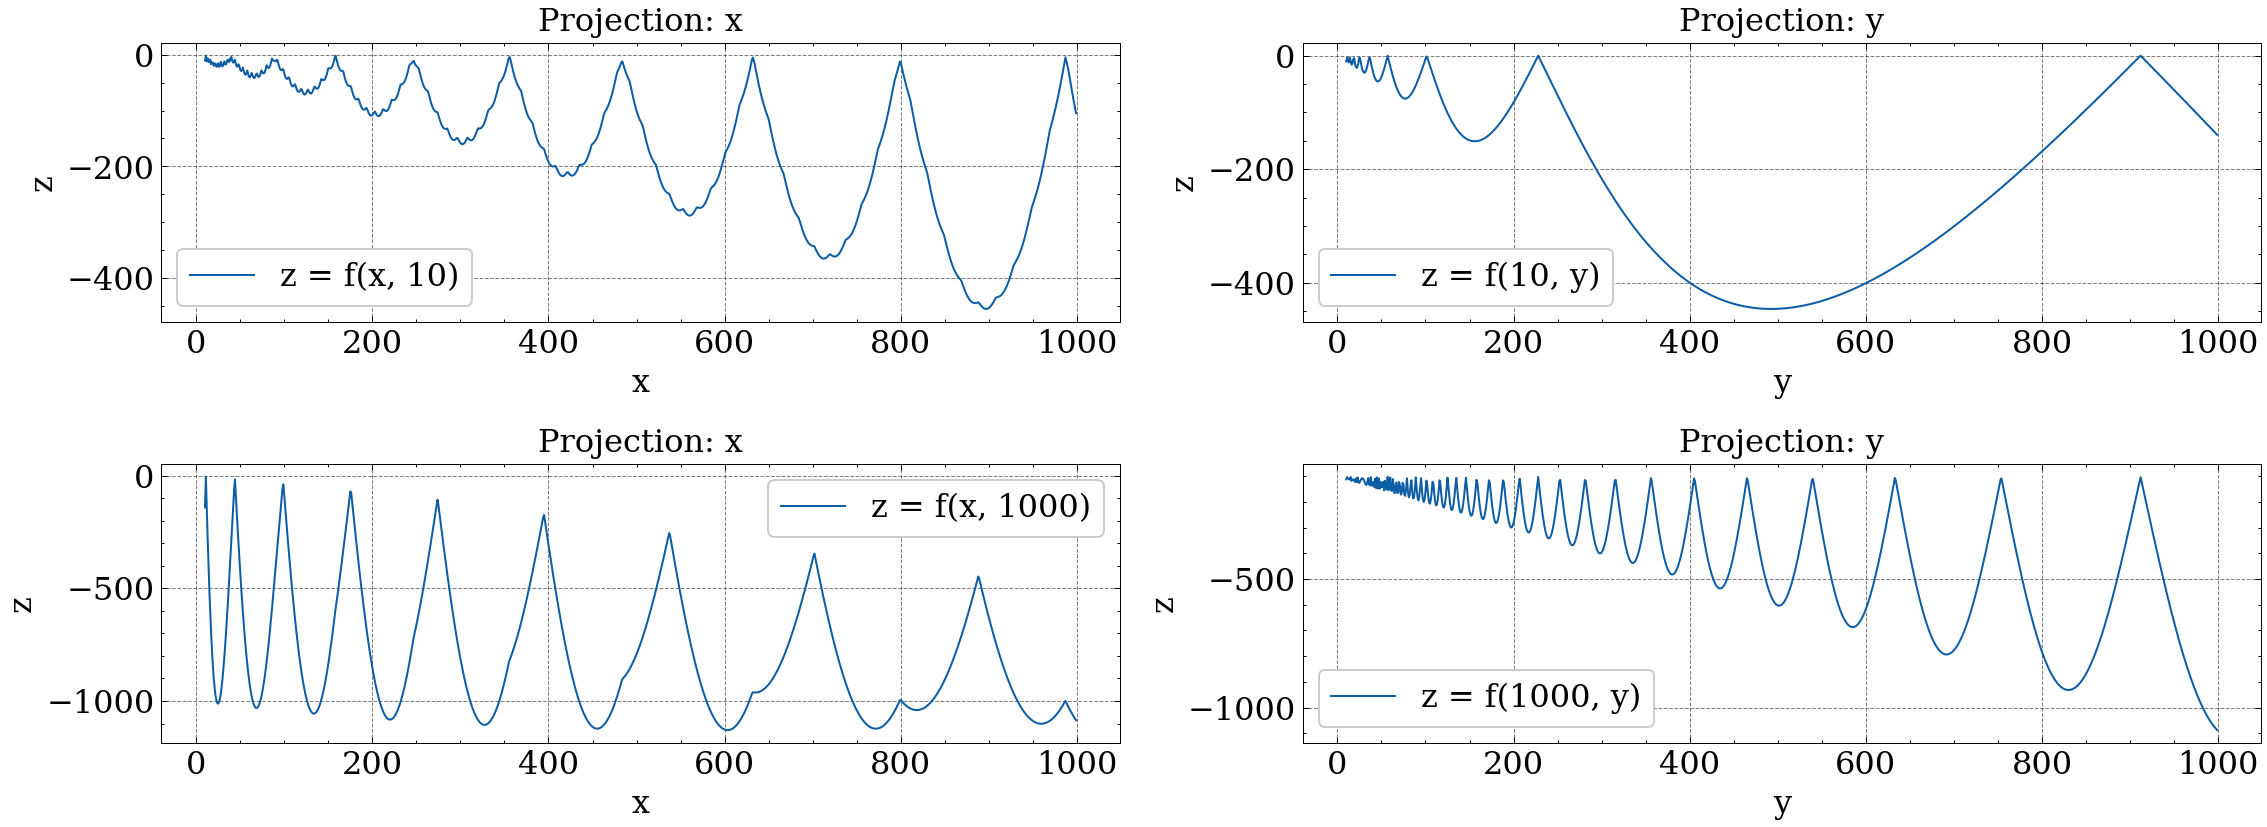

In [88]:
fig = plt.figure(figsize=(16,6))
plt.subplot(221)
z = f(x, 10)
plt.plot(x,z, label=r'z = f(x, 10)')
plt.xlabel(r'x')
plt.ylabel(r'z')
plt.title(r'Projection: x')
plt.legend()

plt.subplot(222)
z = f(10,y)
plt.plot(y,z, label=r'z = f(10, y)')
plt.xlabel(r'y')
plt.ylabel(r'z')
plt.title(r'Projection: y')
plt.legend()

plt.subplot(223)
z = f(x, 1000)
plt.plot(x,z, label=r'z = f(x, 1000)')
plt.xlabel(r'x')
plt.ylabel(r'z')
plt.title(r'Projection: x')
plt.legend()

plt.subplot(224)
z = f(1000,y)
plt.plot(y,z, label=r'z = f(1000, y)')
plt.xlabel(r'y')
plt.ylabel(r'z')
plt.title(r'Projection: y')
plt.legend()

fig.tight_layout()

## Observation

We see that there are a lot of local minima, and that only a corner of the search space contains the optimal region.

This will imply that the initial coordinates of the search space will have a big influence, and we will need a high initial diversity to be able to cover the different regions exhaustively.

# Genetic algorithm

In [176]:
ga = GA(n=100)
coords, fitness = ga.solve(max_gen=100, patience=10)
initial_coords = ga.decode_pop(ga.initial_pop)

print('generations: ', ga.n_gen)
print('coords:', coords)
print('fitness: ', fitness)

generations:  18
coords: (918, 938)
fitness:  -1337.6269447867119


Text(0.5, 1.0, 'initial population')

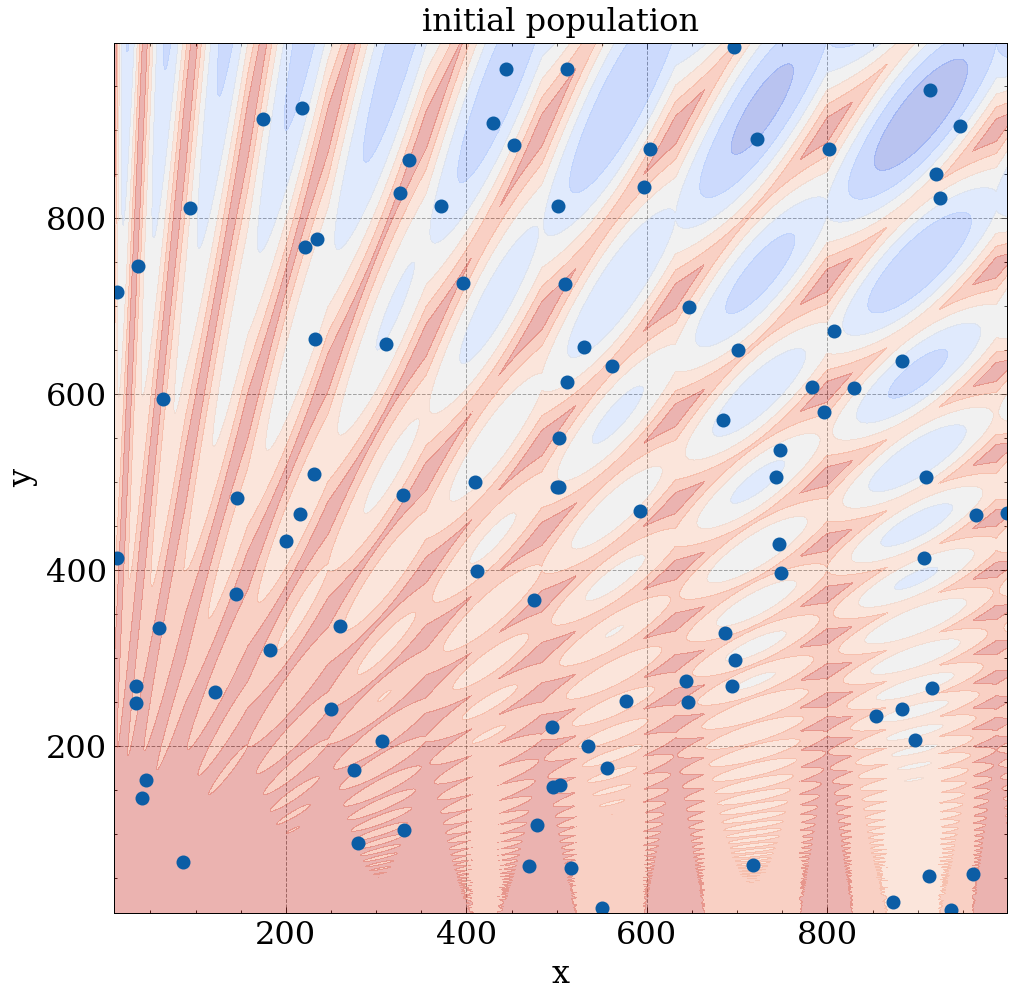

In [177]:
plt.figure(figsize=(8,8))

plt.contourf(x, y, Z, cmap='coolwarm', alpha=0.4)

plt.scatter(initial_coords[:,0], initial_coords[:,1])

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(r'initial population')
# plt.colorbar()

Text(0.5, 1.0, 'final population | generation: 18')

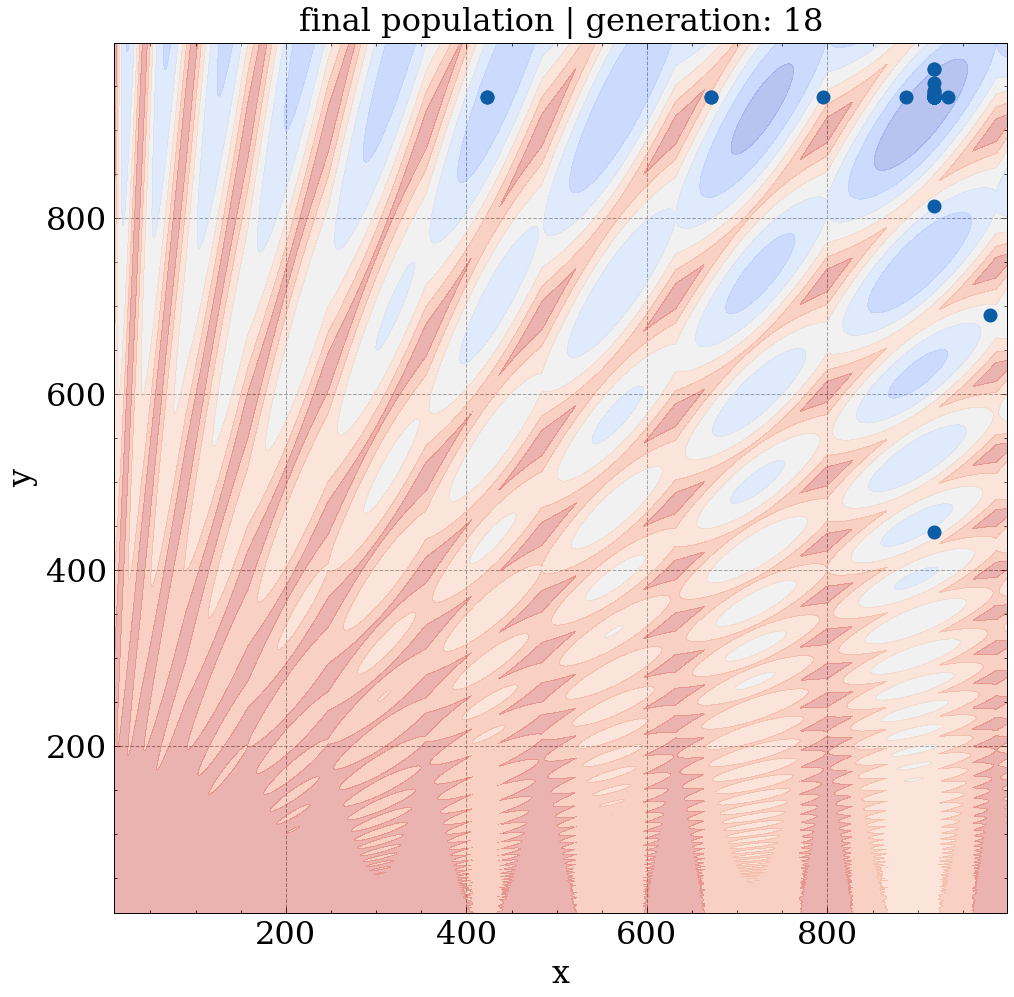

In [178]:
plt.figure(figsize=(8,8))

plt.contourf(x, y, Z, cmap='coolwarm', alpha=0.4)

coords = ga.decode_pop()
plt.scatter(coords[:,0], coords[:,1])

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(rf'final population | generation: {ga.n_gen}')
# plt.colorbar()

# Tests

1) $p_c = 0.6,\ p_m = 0.01$
2) $p_c = 0.6,\ p_m = 0.1$
3) $p_c = 0,\ p_m = 0.01$
4) $p_c = 0,\ p_m = 0.1$

In [361]:
F = [[] for _ in range(4)] # fitnesses
G = [[] for _ in range(4)] # n_gen
n_tests = 50
max_gen = 100

PM = [0.01, 0.1, 0.01, 0.1]
PC = [0.6, 0.6, 0, 0]

for i, (pm, pc) in enumerate(zip(PM, PC)):
    print('test ', i)
    for test in tqdm(range(n_tests)):
        ga = GA(n=100, seed=test)
        _, fitness = ga.solve(max_gen=max_gen, patience=10, pc=pc, pm=pm)
        F[i].append(fitness)
        G[i].append(ga.n_gen)

test  0


  0%|          | 0/50 [00:00<?, ?it/s]

test  1


  0%|          | 0/50 [00:00<?, ?it/s]

test  2


  0%|          | 0/50 [00:00<?, ?it/s]

test  3


  0%|          | 0/50 [00:00<?, ?it/s]

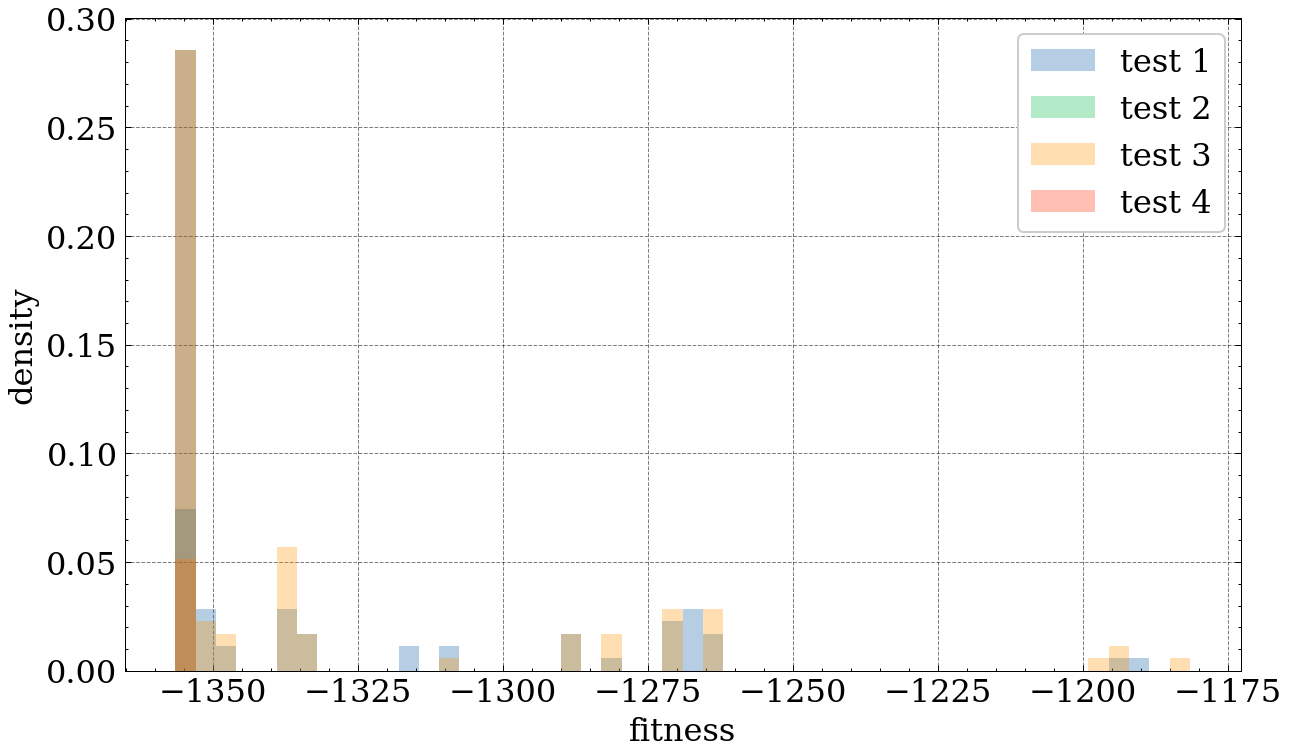

In [363]:
plt.figure(figsize=(10,6))

for i in range(4):
    plt.hist(F[i], bins=50, density=True, alpha=0.3, label=rf'test {i+1}', range=(np.min(F), np.max(F)))

plt.xlabel(r'fitness')
plt.ylabel(r'density')
plt.legend()

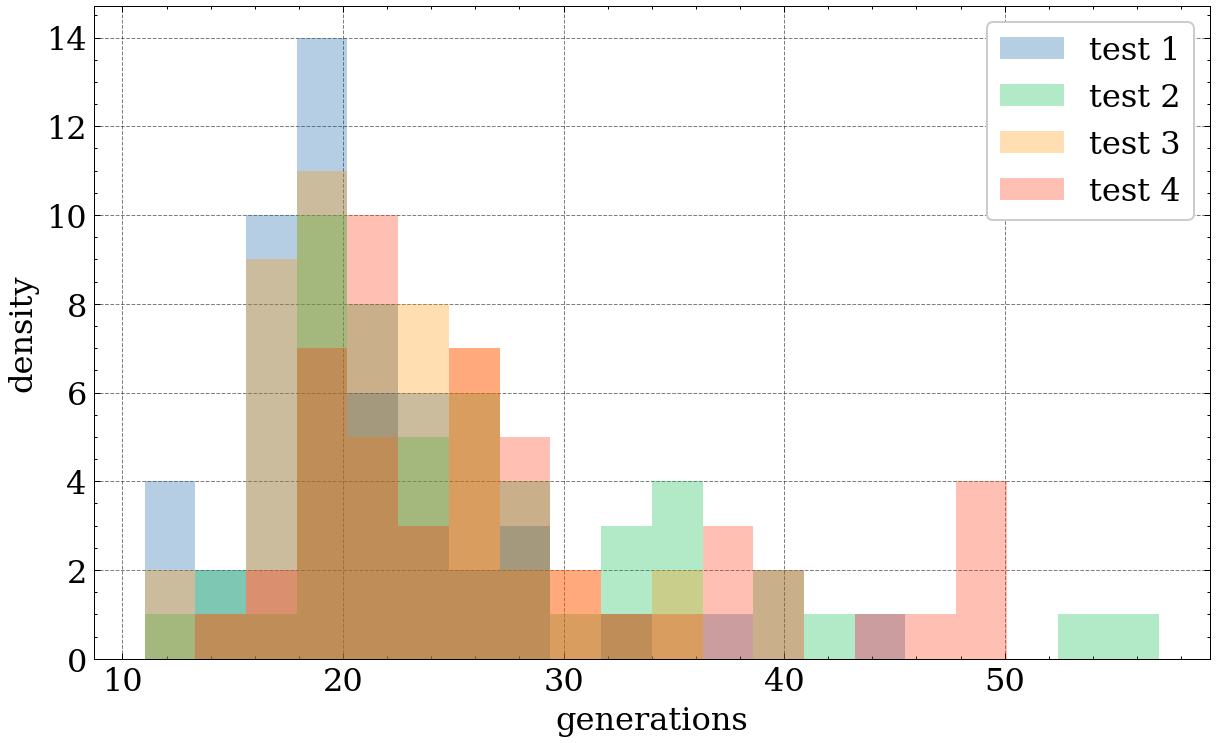

In [364]:
plt.figure(figsize=(10,6))

for i in range(4):
    plt.hist(G[i], bins=20, density=False, alpha=0.3, label=rf'test {i+1}', range=(np.min(G), np.max(G)))

plt.xlabel(r'generations')
plt.ylabel(r'density')
plt.legend()

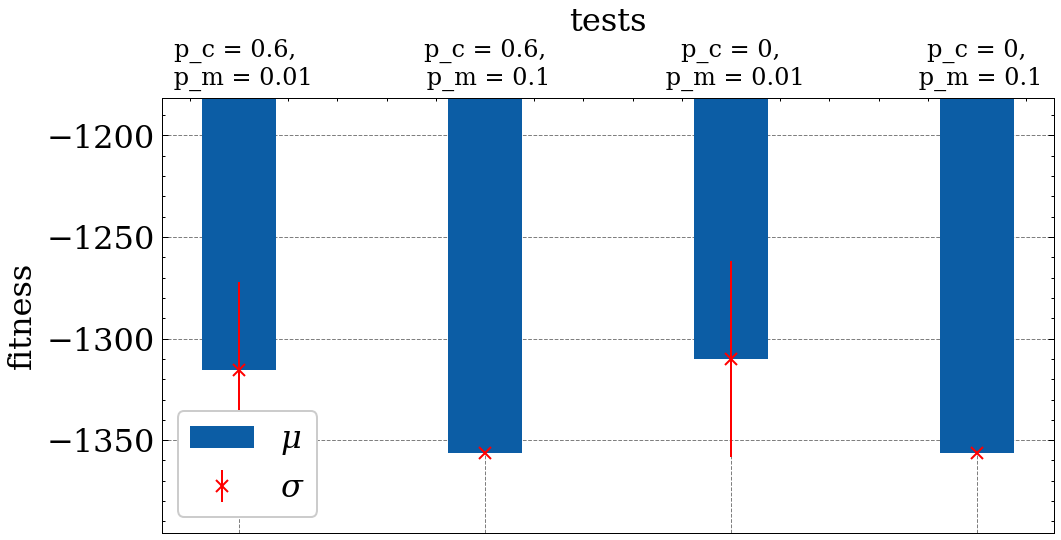

In [365]:
nl = '\n'
labels = [
    rf'p_c = 0.6, {nl} p_m = 0.01', 
    rf'p_c = 0.6,{nl} p_m = 0.1',
    rf'p_c = 0,{nl} p_m = 0.01',
    rf'p_c = 0,{nl} p_m = 0.1'
    ]
mean = np.mean(F, axis=1)
std = np.std(F, axis=1)

plt.figure(figsize=(8,4))

x = ['1', '2', '3', '4']

plt.bar(x, mean, width=.3, label=r'$\mu$')
plt.ylim(np.min(F)-np.std(F), np.max(F))
plt.errorbar(range(4), mean, yerr=std, fmt='x', color='red', lw=1, label=r'$\sigma$')

plt.xlabel(r'tests')
plt.xticks(range(4), labels, fontsize=12)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.ylabel(r'fitness')

plt.legend()


In [341]:
F = [[] for _ in range(4)] # history of fitnesses for each test
n_tests = 10
N=100

PM = [0.01, 0.1, 0.01, 0.1]
PC = [0.6, 0.6, 0, 0]

for i, (pm, pc) in enumerate(zip(PM, PC)):
    print('test ', i)
    for test in tqdm(range(n_tests)):
        ga = GA(n=N, seed=test)
        ga.solve(max_gen=1000, pc=pc, pm=pm, track=True)
        history = ga.history['fitnesses']
        F[i].append(history)

test  0


  0%|          | 0/10 [00:00<?, ?it/s]

test  1


  0%|          | 0/10 [00:00<?, ?it/s]

test  2


  0%|          | 0/10 [00:00<?, ?it/s]

test  3


  0%|          | 0/10 [00:00<?, ?it/s]

## Fitness evaluations

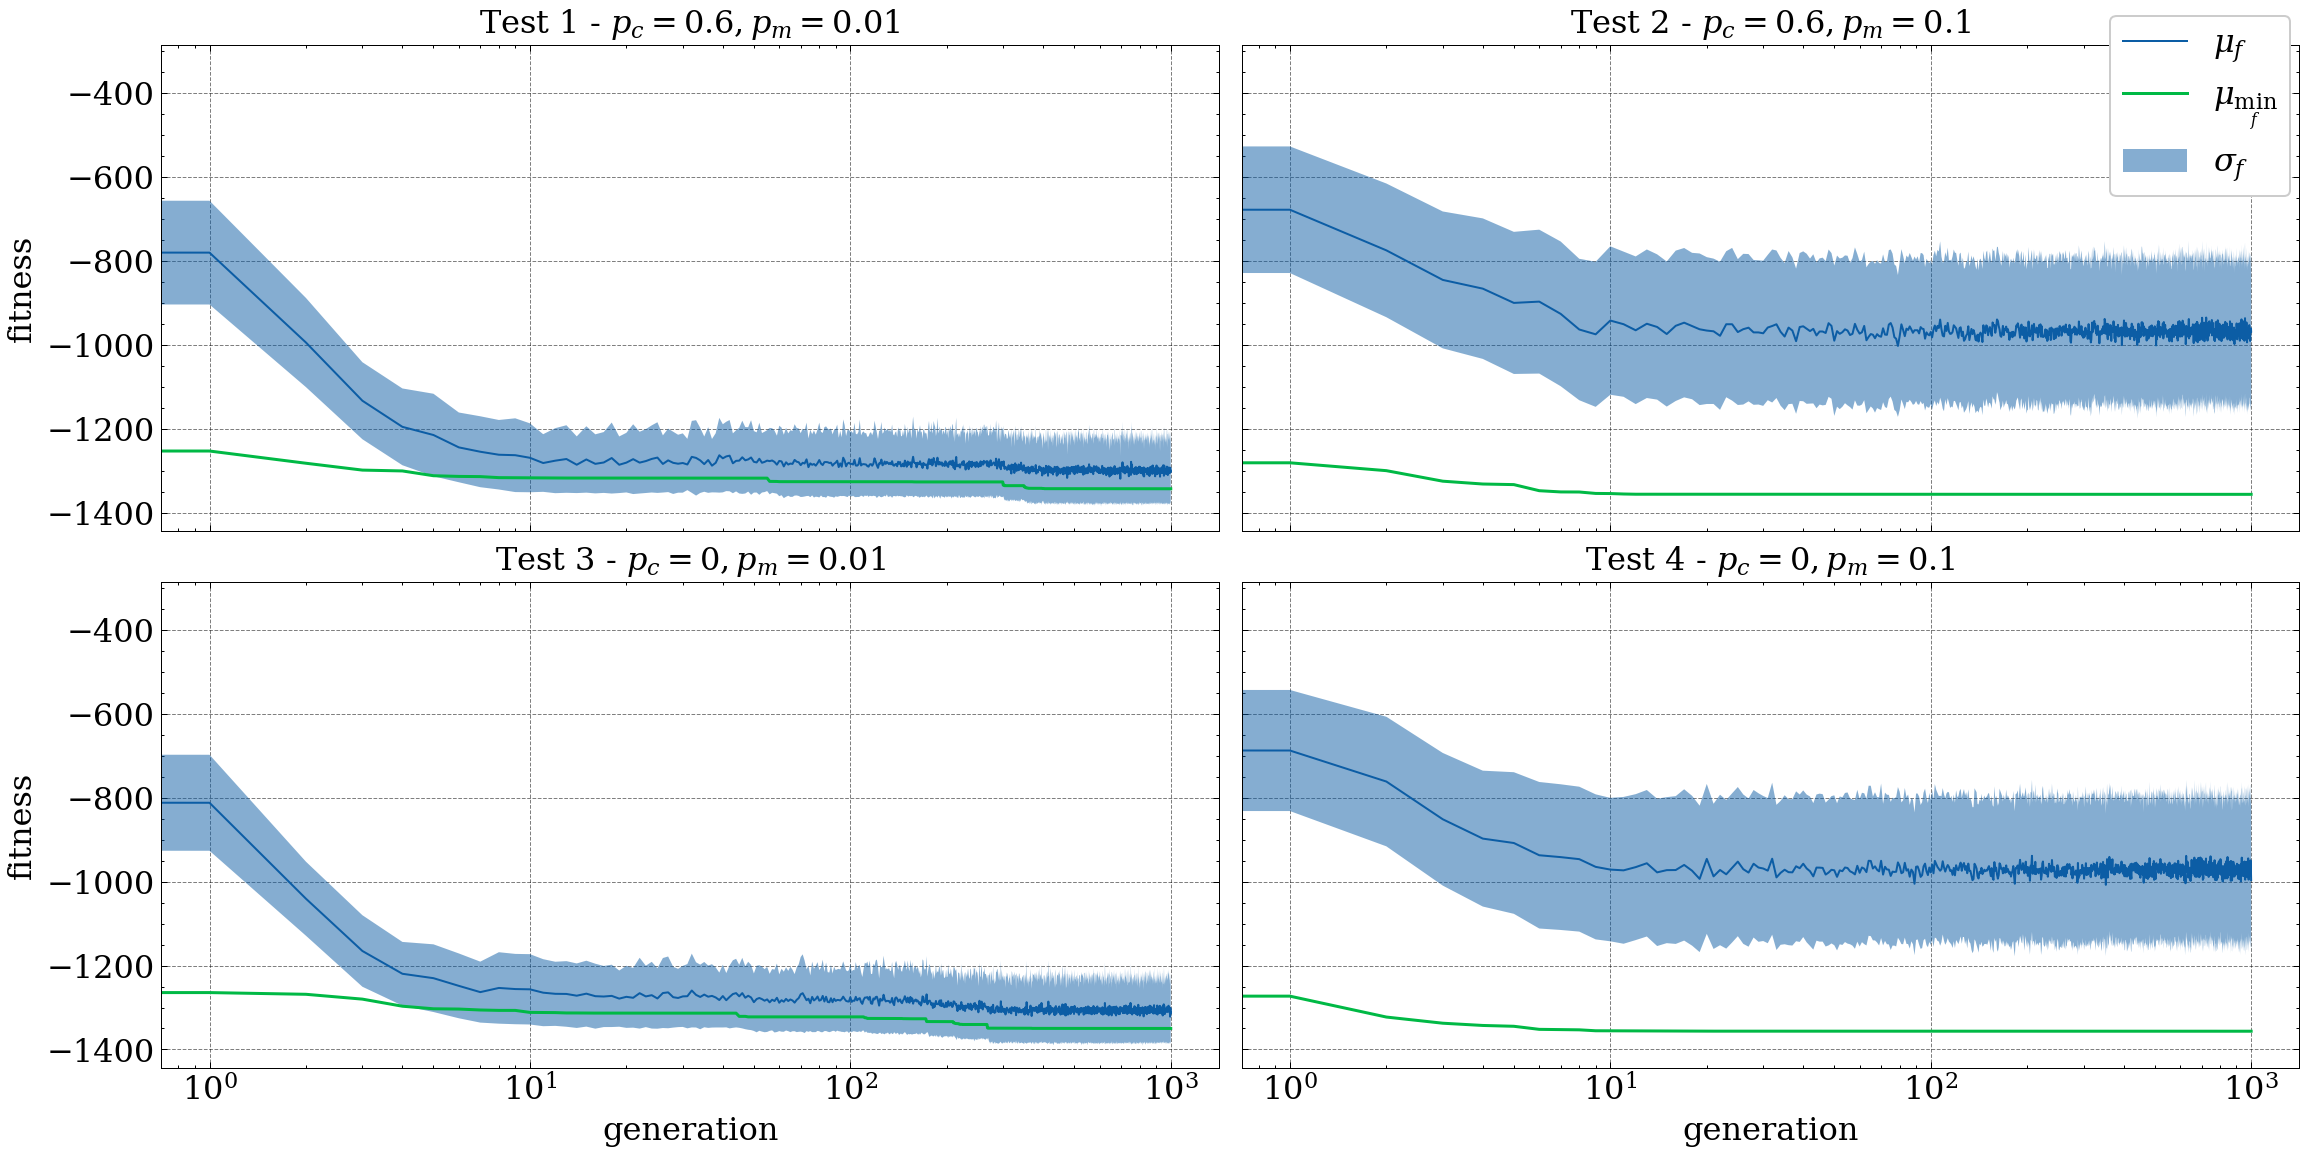

In [342]:
titles = [
    rf'Test 1 - $p_c = 0.6, p_m = 0.01$', 
    rf'Test 2 - $p_c = 0.6, p_m = 0.1$',
    rf'Test 3 - $p_c = 0, p_m = 0.01$',
    rf'Test 4 - $p_c = 0, p_m = 0.1$'
    ]

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(16,8), constrained_layout=True)

for i in range(4):

    histories = np.array(F[i])
    mean = np.mean(histories, axis=(0,2))
    std = np.std(histories, axis=(0,2))
    min_ = np.mean(np.min(histories, axis=2), axis=0)

    x = range(1001)
    ax.ravel()[i].set_title(titles[i])
    ax.ravel()[i].plot(x, mean, label=r'$\mu_f$' if i==0 else None)
    ax.ravel()[i].fill_between(
        x, 
        mean-std/2, 
        mean+std/2, 
        alpha=0.5, 
        label=r'$\sigma_f$' if i==0 else None
        )
    ax.ravel()[i].plot(x, min_, lw=1.5, label=r'$\mu_{\min_f}$'  if i==0 else None)
    ax.ravel()[i].set_xscale('log')
    
ax[1,0].set_xlabel(r'generation')
ax[1,1].set_xlabel(r'generation')
ax[0,0].set_ylabel(r'fitness')
ax[1,0].set_ylabel(r'fitness')
fig.legend()

## Empirical cdfs

In [351]:
H = [[] for _ in range(4)] # history of fitnesses for each test
O = [[] for _ in range(4)] # optimal fitnesses
n_tests = 10
N=100

PM = [0.01, 0.1, 0.01, 0.1]
PC = [0.6, 0.6, 0, 0]

for i, (pm, pc) in enumerate(zip(PM, PC)):
    print('test ', i)
    for test in tqdm(range(n_tests)):
        ga = GA(n=N, seed=test)
        _, fitness = ga.solve(max_gen=100, pc=pc, pm=pm, track=True)
        history = ga.history['fitnesses']
        H[i].append(history)
        O[i].append(fitness)

test  0


  0%|          | 0/10 [00:00<?, ?it/s]

test  1


  0%|          | 0/10 [00:00<?, ?it/s]

test  2


  0%|          | 0/10 [00:00<?, ?it/s]

test  3


  0%|          | 0/10 [00:00<?, ?it/s]

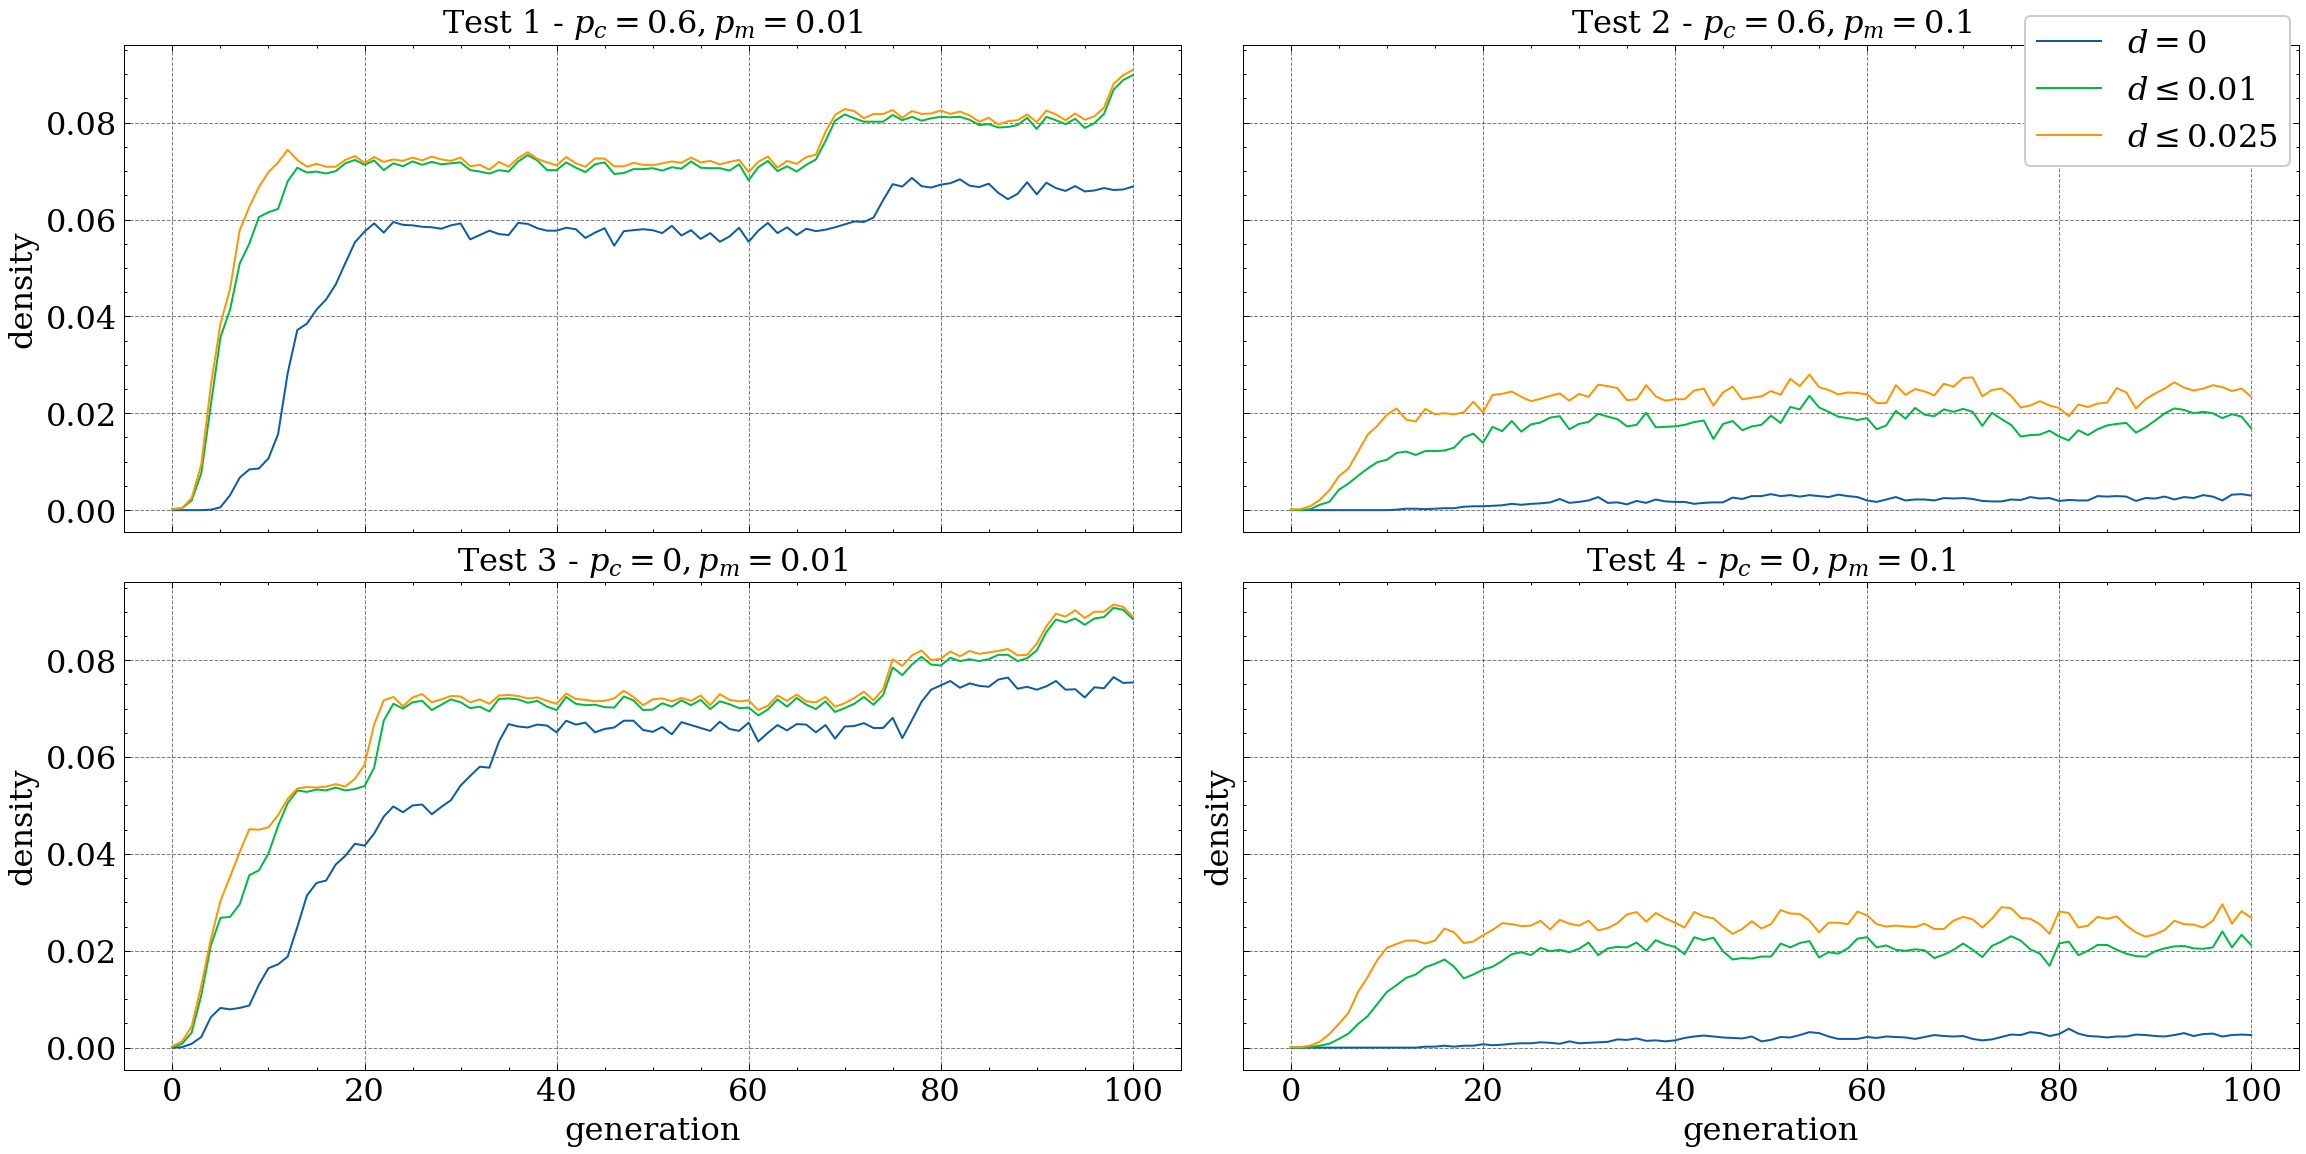

In [352]:
titles = [
    rf'Test 1 - $p_c = 0.6, p_m = 0.01$', 
    rf'Test 2 - $p_c = 0.6, p_m = 0.1$',
    rf'Test 3 - $p_c = 0, p_m = 0.01$',
    rf'Test 4 - $p_c = 0, p_m = 0.1$'
    ]

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(16,8), constrained_layout=True)

for i in range(4):

    histories = np.array(H[i])
    opt = np.array(O[i])
    D = np.abs((histories - opt[:, None, None]) / opt[:, None, None])

    D_0 = (D==0).sum(axis=(0,2)) / 10000
    D_1 = (D<=0.01).sum(axis=(0,2)) / 10000
    D_2 = (D<=0.025).sum(axis=(0,2)) / 10000

    x = range(101)
    ax.ravel()[i].set_title(titles[i])
    ax.ravel()[i].plot(x, D_0, label=r'$d=0$' if i==0 else None)
    ax.ravel()[i].plot(x, D_1, label=r'$d\leq 0.01$' if i==0 else None)
    ax.ravel()[i].plot(x, D_2, label=r'$d\leq 0.025$' if i==0 else None)

    plt.xlabel(r'generation')
    plt.ylabel(r'density')

    
ax[1,0].set_xlabel(r'generation')
ax[1,1].set_xlabel(r'generation')
ax[0,0].set_ylabel(r'density')
ax[1,0].set_ylabel(r'density')
fig.legend()

In [347]:
H = [[] for _ in range(4)] # history of fitnesses for each test
O = [[] for _ in range(4)] # optimal fitnesses
n_tests = 10
N=100

PM = [0.01, 0.1, 0.01, 0.1]
PC = [0.6, 0.6, 0, 0]

for i, (pm, pc) in enumerate(zip(PM, PC)):
    print('test ', i)
    for test in tqdm(range(n_tests)):
        ga = GA(n=N, seed=test)
        _, fitness = ga.solve(max_gen=1000, pc=pc, pm=pm, track=True)
        history = ga.history['fitnesses']
        H[i].append(history)
        O[i].append(fitness)

test  0


  0%|          | 0/10 [00:00<?, ?it/s]

test  1


  0%|          | 0/10 [00:00<?, ?it/s]

test  2


  0%|          | 0/10 [00:00<?, ?it/s]

test  3


  0%|          | 0/10 [00:00<?, ?it/s]

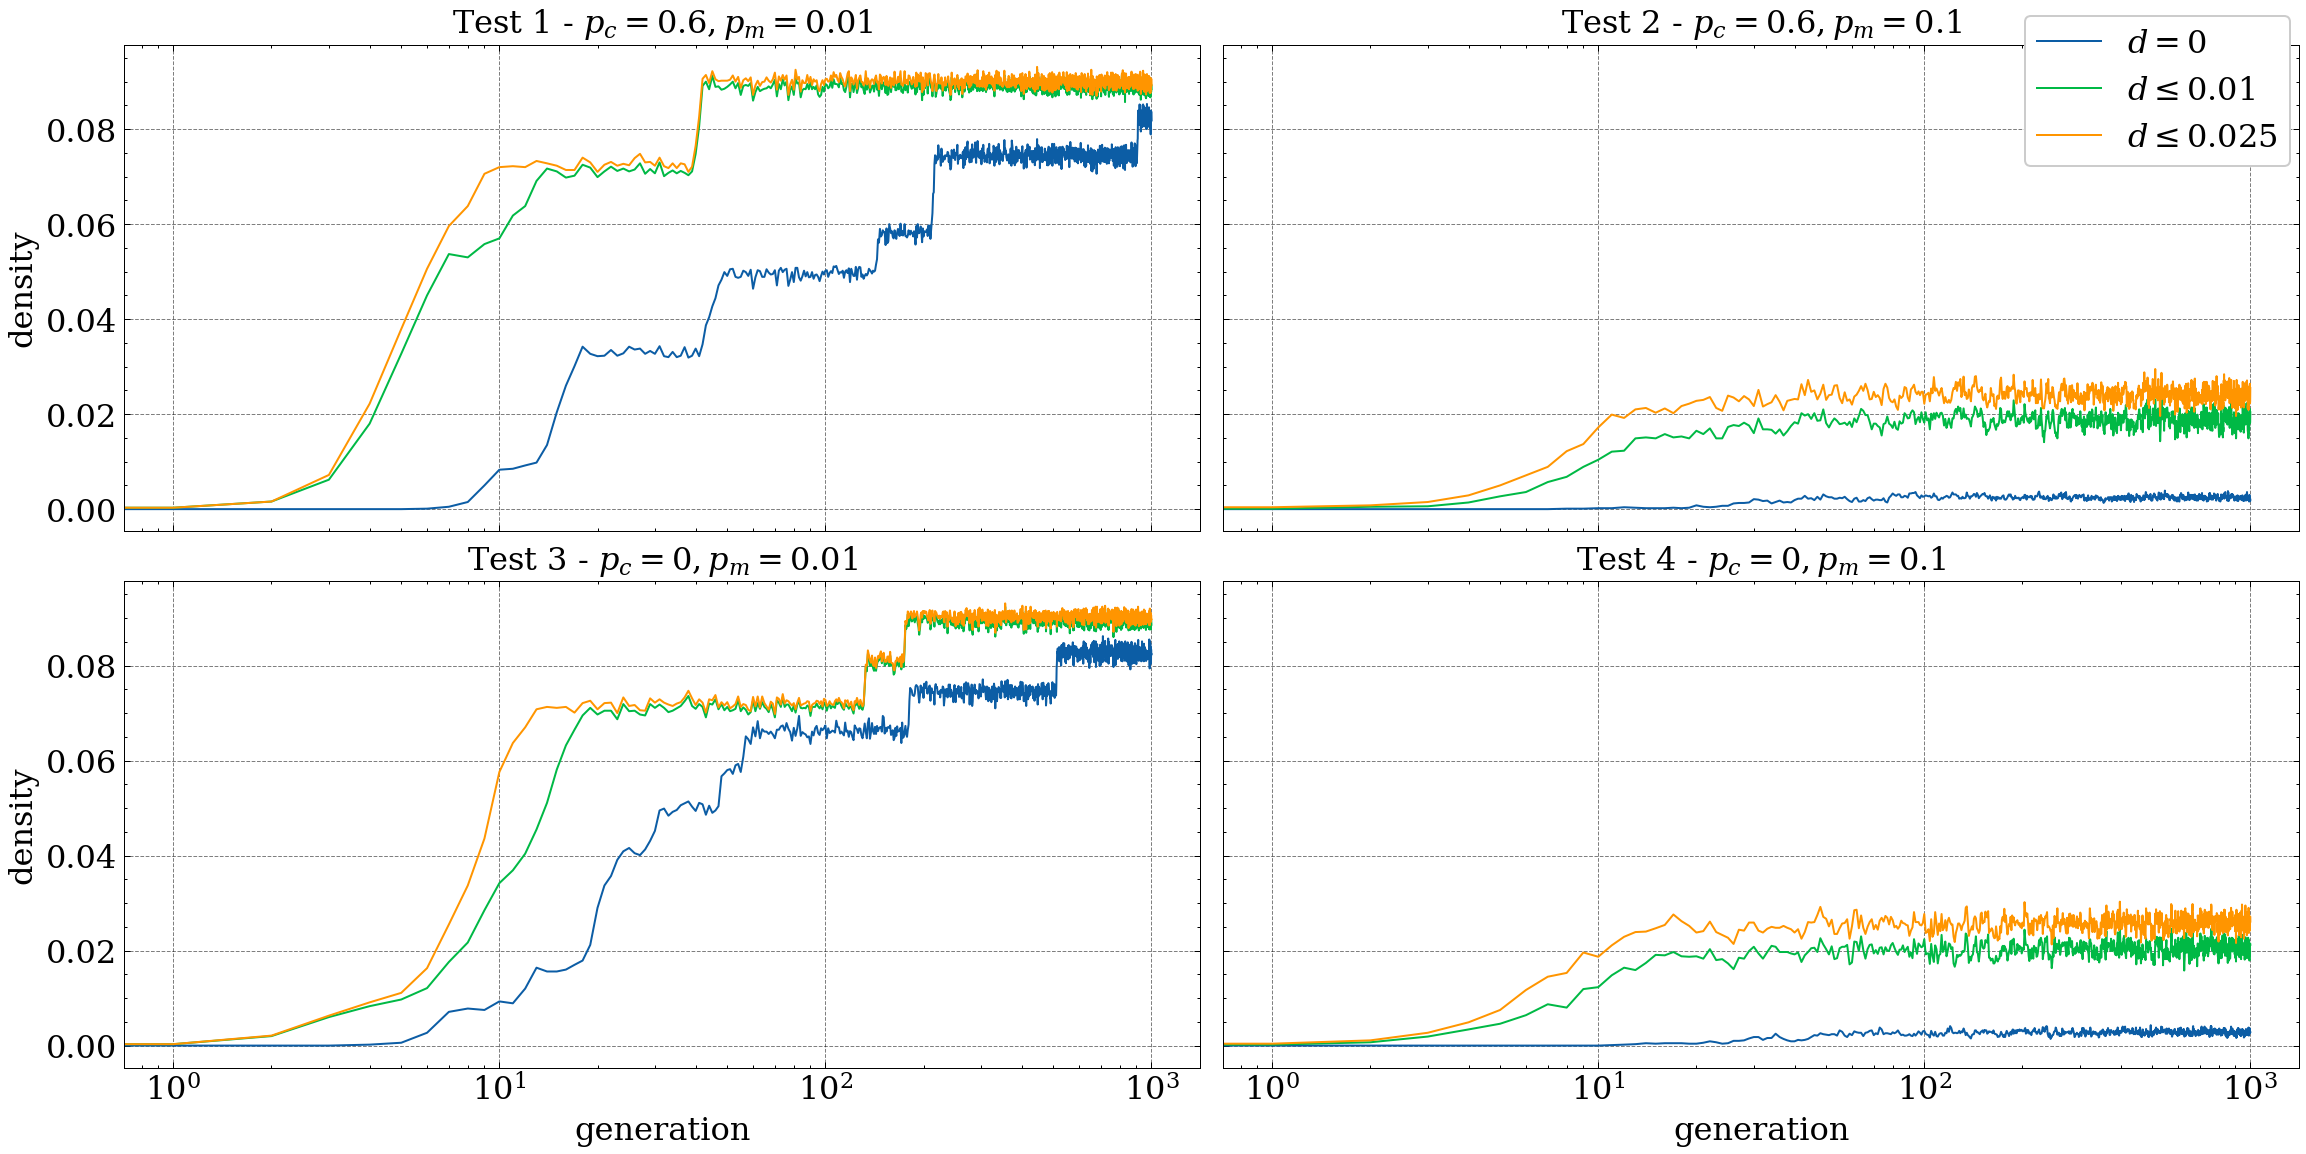

In [350]:
titles = [
    rf'Test 1 - $p_c = 0.6, p_m = 0.01$', 
    rf'Test 2 - $p_c = 0.6, p_m = 0.1$',
    rf'Test 3 - $p_c = 0, p_m = 0.01$',
    rf'Test 4 - $p_c = 0, p_m = 0.1$'
    ]

fig, ax = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(16,8), constrained_layout=True)

for i in range(4):

    histories = np.array(H[i])
    opt = np.array(O[i])
    D = np.abs((histories - opt[:, None, None]) / opt[:, None, None])

    D_0 = (D==0).sum(axis=(0,2)) / 10000
    D_1 = (D<=0.01).sum(axis=(0,2)) / 10000
    D_2 = (D<=0.025).sum(axis=(0,2)) / 10000

    x = range(1001)
    ax.ravel()[i].set_title(titles[i])
    ax.ravel()[i].plot(x, D_0, label=r'$d=0$' if i==0 else None)
    ax.ravel()[i].plot(x, D_1, label=r'$d\leq 0.01$' if i==0 else None)
    ax.ravel()[i].plot(x, D_2, label=r'$d\leq 0.025$' if i==0 else None)
    ax.ravel()[i].set_xscale('log')
    
ax[1,0].set_xlabel(r'generation')
ax[1,1].set_xlabel(r'generation')
ax[0,0].set_ylabel(r'density')
ax[1,0].set_ylabel(r'density')
fig.legend()

## Try with N=10 to see differences

In [371]:
H = [[] for _ in range(10)] # history of fitnesses for each test
n_tests = 10
N=100

PM = np.linspace(0.01, 0.5, num=10)

for i, pm in tqdm(enumerate(PM)):
    for test in range(n_tests):
        ga = GA(n=N, seed=test)
        _, fitness = ga.solve(max_gen=100, pc=0.5, pm=pm, track=True)
        history = ga.history['fitnesses']
        H[i].append(history)

0it [00:00, ?it/s]

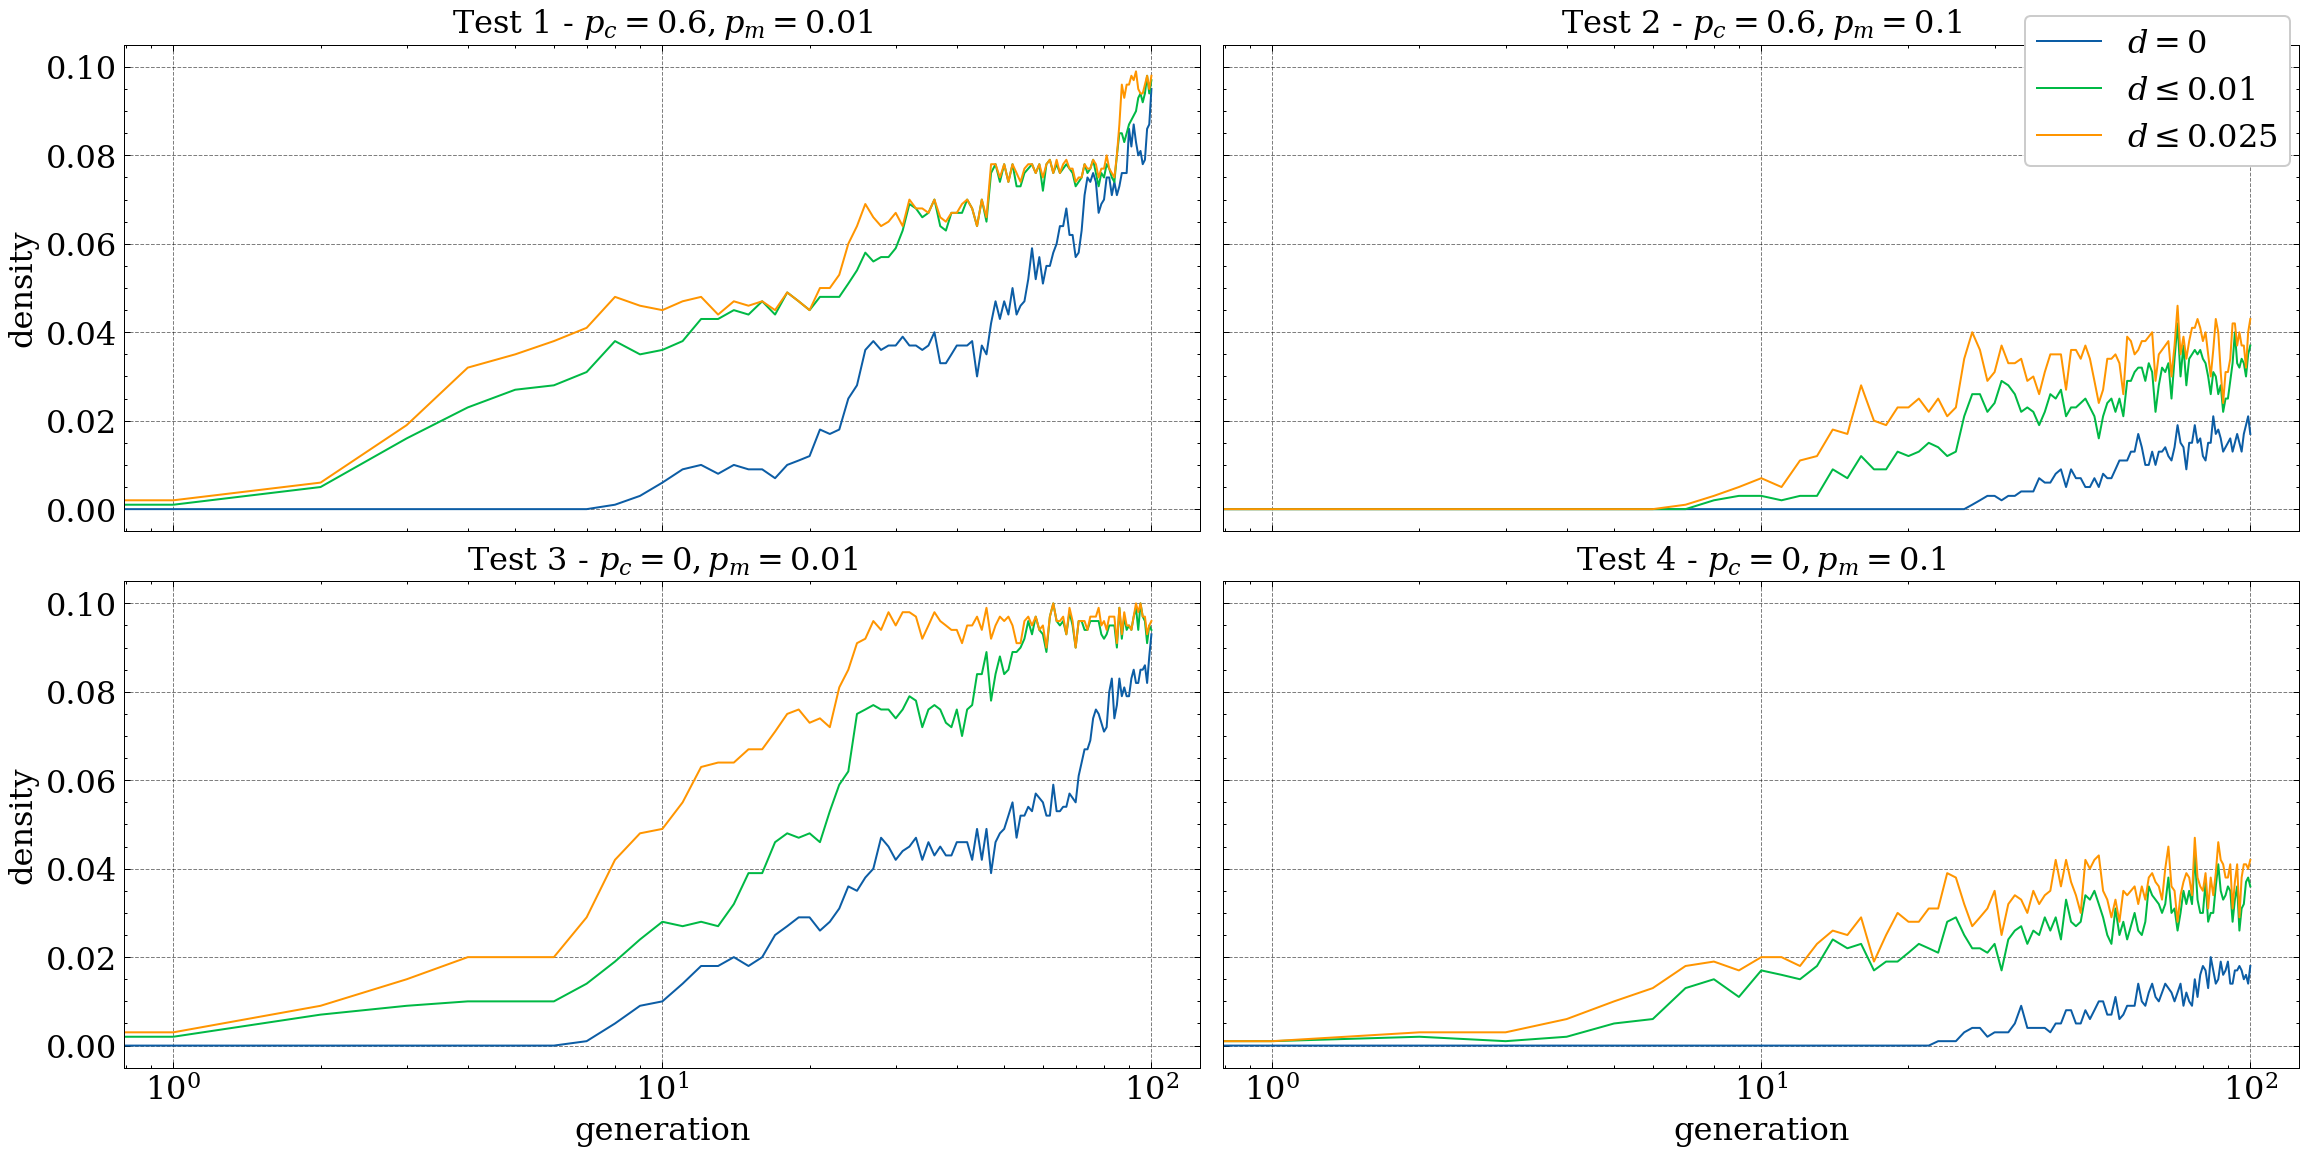

In [360]:
plt.figure(figsize=(10,6))

for i in range(10):

    histories = np.array(F[i])
    mean = np.mean(histories, axis=(0,2))
    std = np.std(histories, axis=(0,2))
    min_ = np.mean(np.min(histories, axis=2), axis=0)

    x = range(1001)
    ax.ravel()[i].set_title(titles[i])
    ax.ravel()[i].plot(x, mean, label=r'$\mu_f$' if i==0 else None)
    ax.ravel()[i].fill_between(
        x, 
        mean-std/2, 
        mean+std/2, 
        alpha=0.5, 
        label=r'$\sigma_f$' if i==0 else None
        )
    ax.ravel()[i].plot(x, min_, lw=1.5, label=r'$\mu_{\min_f}$'  if i==0 else None)
    ax.ravel()[i].set_xscale('log')
    
ax[1,0].set_xlabel(r'generation')
ax[1,1].set_xlabel(r'generation')
ax[0,0].set_ylabel(r'fitness')
ax[1,0].set_ylabel(r'fitness')
fig.legend()